In [190]:
from __future__ import (division, unicode_literals, absolute_import,
                        print_function)

from ema_workbench import (Model, RealParameter, Constant, CategoricalParameter, 
                           TimeSeriesOutcome, ScalarOutcome, ema_logging, perform_experiments, 
                           MultiprocessingEvaluator, Policy)
from ema_workbench.connectors.vensim import (VensimModel , VensimModelStructureInterface, set_value)
from ema_workbench.em_framework.samplers import sample_levers
from ema_workbench.util.utilities import save_results
from ema_workbench import load_results
from ema_workbench.analysis import pairs_plotting
from ema_workbench.analysis.pairs_plotting import (pairs_lines, pairs_scatter)
from ema_workbench.analysis import clusterer, plotting, Density, prim
from ema_workbench.analysis.plotting import lines, envelopes, kde_over_time, multiple_densities


import matplotlib.ticker as mtick
import timeit
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from ema_workbench.analysis.plotting import lines

Load results

In [3]:
#Load dataframes
#df_depth = pd.read_excel(r'C:\Users\douwe\OneDrive\Documenten\1.0 School\8.0 Thesis\5.0 Execution\Maasmodel\Results\policy_depths2_max.xlsx',sheet_name='Sheet1', index_col=0)

In [4]:
#df_depth.drop(columns=df_depth.columns[0],
#             axis=1, inplace=True)

In [5]:
#nopol=[]

#for i in range(len(df_depth)):
#    if df_depth['policy'][i]=='No policy':
#        nopol.append([i])


#nopols = df_depth.iloc[0:8000]

In [6]:
#Save dataframe to excel 
#nopols.to_excel(r"C:\Users\douwe\OneDrive\Documenten\1.0 School\8.0 Thesis\5.0 Execution\Maasmodel\Results\base_depths2_max.xlsx")

In [2]:
#Read dataframe
nopols = pd.read_excel(r"C:\Users\douwe\OneDrive\Documenten\1.0 School\8.0 Thesis\5.0 Execution\Maasmodel\Results\base_depths2_basedonfwb.xlsx",sheet_name='Sheet1', index_col=0)
maxdepth = pd.read_excel(r"C:\Users\douwe\OneDrive\Documenten\1.0 School\8.0 Thesis\5.0 Execution\Maasmodel\Results\base_depths2_max.xlsx",sheet_name='Sheet1', index_col=0)
df_outcome = pd.read_excel(r"C:\Users\douwe\OneDrive\Documenten\1.0 School\8.0 Thesis\5.0 Execution\Maasmodel\Results\base_dataframe.xlsx",sheet_name='Sheet1', index_col=0)

# First a line plot

In [ ]:
"""
Select from:
'Percentage of full fresh water buffer[Weir1]'
'Percentage of full fresh water buffer[Weir2]'
'Percentage of full fresh water buffer[Weir3]'
'Percentage of full fresh water buffer[Weir4]'
'Percentage of full fresh water buffer[Weir5]'
'Percentage of full fresh water buffer[Weir6]'
'Average velocity through weir section[Weir1]'
'Average velocity through weir section[Weir2]'
'Average velocity through weir section[Weir3]'
'Average velocity through weir section[Weir4]'
'Average velocity through weir section[Weir5]'
'Average velocity through weir section[Weir6]'
'"I/C value at lock"[Weir1]'
'"I/C value at lock"[Weir2]'
'"I/C value at lock"[Weir3]'
'"I/C value at lock"[Weir4]'
'"I/C value at lock"[Weir5]'
'"I/C value at lock"[Weir6]'
'Days of free flow'
                        
"""

In [ ]:
#Fresh water buffer

outcome = 'Percentage of full fresh water buffer[Weir5]'
fig, axes = lines(experiments, outcomes, 
                  outcomes_to_show = outcome,
           #       group_by = 'Draught period intensity',
                  density = Density.KDE, 
                  legend = True,
                  titles={outcome:'Percentage of full fresh water buffer in weir section 1'},
                  ylabels={outcome:'Percentage volume [%]'})

fig.set_size_inches(12, 5)
if save:
    plt.savefig( wd + 'FreshwaterBuffer_BaseEnsamble.png', dpi=300)


# Violin plot

Fresh water buffer

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Percentage compared to full fresh water buffer [%]')

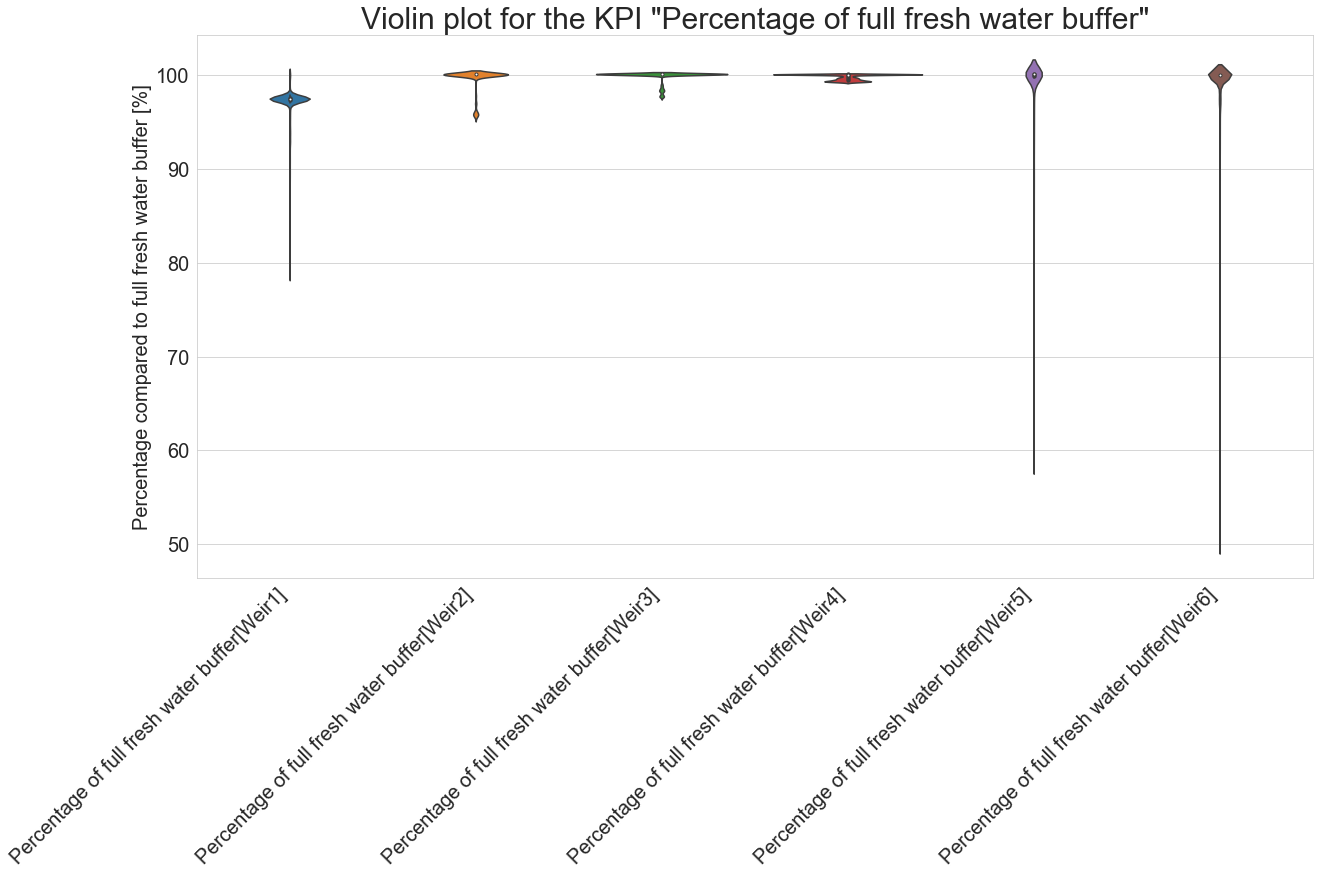

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))
ax = sns.violinplot(data=df_outcome.iloc[:,1:7])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right',
                   fontweight='light', fontsize=20)

plt.yticks(fontsize=20)    

plt.title('Violin plot for the KPI "Percentage of full fresh water buffer"', fontsize=30)
plt.ylabel("Percentage compared to full fresh water buffer [%]", fontsize=20) 

I/C value

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'I/C value [-]')

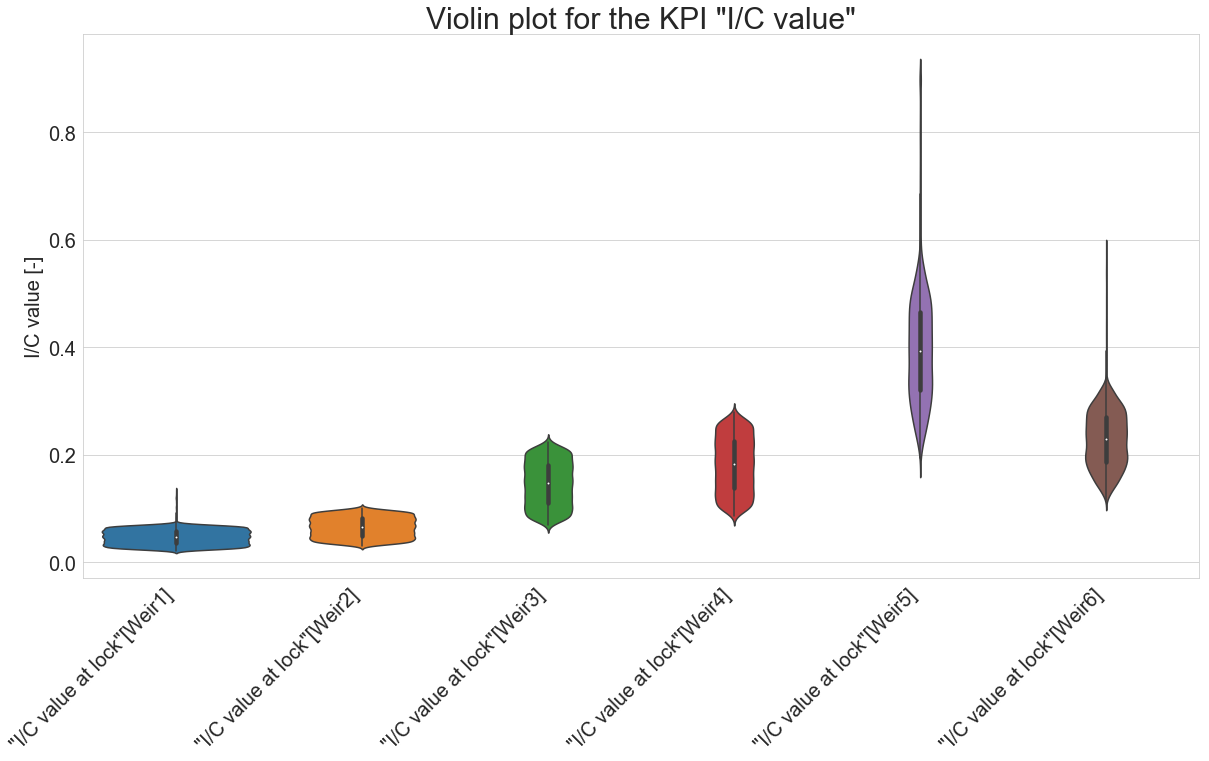

In [58]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))
ax = sns.violinplot(data=df_outcome.iloc[:,13:19])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right',
                   fontweight='light', fontsize=20)

plt.yticks(fontsize=20)    

plt.title('Violin plot for the KPI "I/C value"', fontsize=30)
plt.ylabel("I/C value [-]", fontsize=20) 

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Average velocity through the weir section [m/s]')

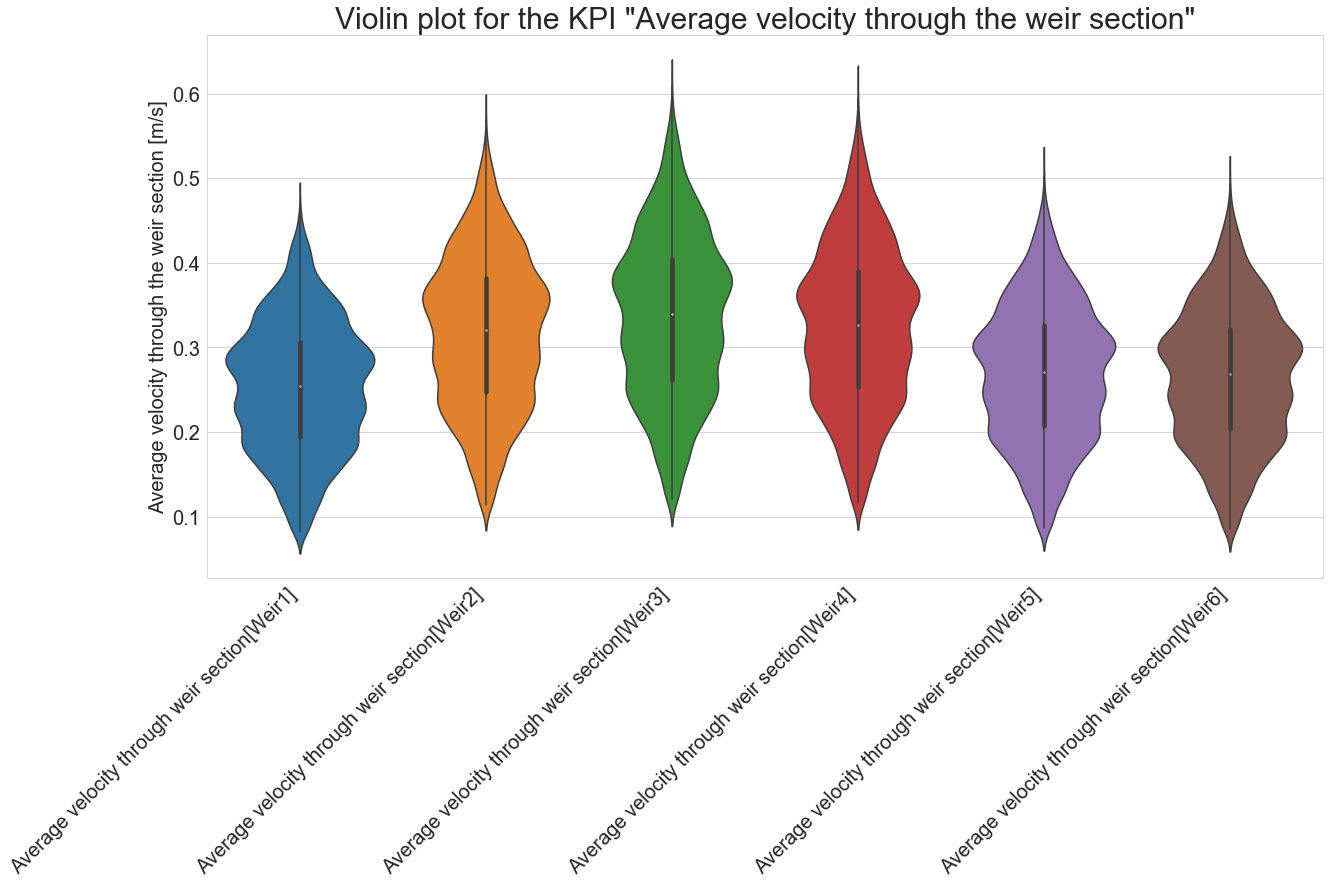

In [59]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))
ax = sns.violinplot(data=df_outcome.iloc[:,7:13])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right',
                   fontweight='light', fontsize=20)

plt.yticks(fontsize=20) 

plt.title('Violin plot for the KPI "Average velocity through the weir section"', fontsize=30)
plt.ylabel("Average velocity through the weir section [m/s]", fontsize=20) 

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Percentage compared to full fresh water buffer [%]')

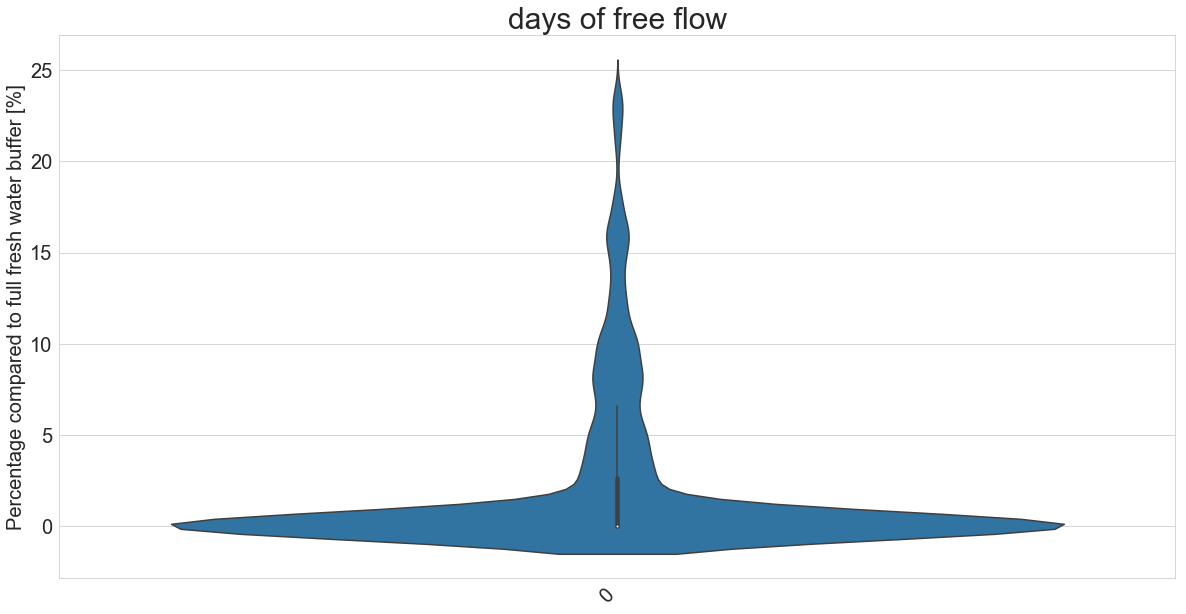

In [61]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))
ax = sns.violinplot(data=df_outcome.iloc[:,6])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right',
                   fontweight='light', fontsize=20)

plt.yticks(fontsize=20)    

plt.title('days of free flow', fontsize=30)
plt.ylabel("Percentage compared to full fresh water buffer [%]", fontsize=20) 

# Visualization statistical regret

In [3]:
percent=int(len(df_outcome.iloc[:,0])*0.01)

linne = np.mean(df_outcome.iloc[:,0].nsmallest(percent))
roermond = np.mean(df_outcome.iloc[:,1].nsmallest(percent))
belfeld = np.mean(df_outcome.iloc[:,2].nsmallest(percent))
sambeek = np.mean(df_outcome.iloc[:,3].nsmallest(percent))
grave = np.mean(df_outcome.iloc[:,4].nsmallest(percent))
lith = np.mean(df_outcome.iloc[:,5].nsmallest(percent))
min_fwb = [linne,roermond,belfeld,sambeek,grave,lith]

In [4]:
linne = df_outcome.iloc[:,0].std()
roermond = df_outcome.iloc[:,1].std()
belfeld = df_outcome.iloc[:,2].std()
sambeek = df_outcome.iloc[:,3].std()
grave = df_outcome.iloc[:,4].std()
lith = df_outcome.iloc[:,5].std()
std_fwb = [linne,roermond,belfeld,sambeek,grave,lith]

In [5]:
linne = df_outcome.iloc[:,0].mean()
roermond = df_outcome.iloc[:,1].mean()
belfeld = df_outcome.iloc[:,2].mean()
sambeek = df_outcome.iloc[:,3].mean()
grave = df_outcome.iloc[:,4].mean()
lith = df_outcome.iloc[:,5].mean()
mean_fwb = [linne,roermond,belfeld,sambeek,grave,lith]

In [6]:
weir_loc = ['Linne', 'Roermond', 'Belfeld','Sambeek','Grave','Lith']

In [10]:
data = {'Weir section':weir_loc,
        'Minimum volume [% full buffer]':min_fwb,
        'Standard deviation [% full buffer]': std_fwb,
        'Mean volume [% buffer]': mean_fwb}
scatter = pd.DataFrame(data)
scatter

,Weir section,Minimum volume [% full buffer],Standard deviation [% full buffer],Mean volume [% buffer]
0,Linne,85.062486,1.866297,96.975697
1,Roermond,95.512438,1.286646,99.566719
2,Belfeld,97.615827,0.616531,99.853490
3,Sambeek,99.207587,0.320700,99.760953
4,Grave,73.062967,4.602844,98.384578
5,Lith,75.016376,3.309288,99.062073


(0, 5.5)

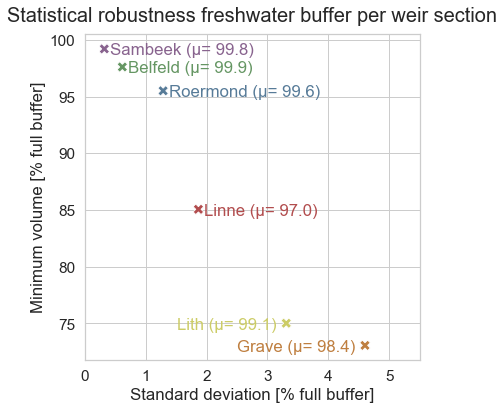

In [12]:
plt.figure(figsize = (6,6))
sns.set(font_scale=1.4, style='whitegrid')
clr_palette = sns.color_palette("Set1",6, desat=0.5)

g = sns.scatterplot(data=scatter, x='Standard deviation [% full buffer]', y='Minimum volume [% full buffer]', 
                    hue='Weir section',s=110, palette=clr_palette, marker="X", legend=False)

plt.title('Statistical robustness freshwater buffer per weir section', fontsize=20, y=1.02)


a=+0.1
b=-0.5
g.text(scatter.iloc[0,2]+a ,scatter.iloc[0,1]+b ,'Linne (μ= %s)' % (round(scatter.iloc[0,3],1)), color=clr_palette[0])
g.text(scatter.iloc[1,2]+a ,scatter.iloc[1,1]+b ,'Roermond (μ= %s)' % (round(scatter.iloc[1,3],1)), color=clr_palette[1])
g.text(scatter.iloc[2,2]+a ,scatter.iloc[2,1]+b ,'Belfeld (μ= %s)' % (round(scatter.iloc[2,3],1)), color=clr_palette[2])
g.text(scatter.iloc[3,2]+a ,scatter.iloc[3,1]+b ,'Sambeek (μ= %s)' % (round(scatter.iloc[3,3],1)), color=clr_palette[3])
g.text(scatter.iloc[4,2]-2.1 ,scatter.iloc[4,1]+b ,'Grave (μ= %s)' % (round(scatter.iloc[4,3],1)), color=clr_palette[4])
g.text(scatter.iloc[5,2]-1.8 ,scatter.iloc[5,1]+b ,'Lith (μ= %s)' % (round(scatter.iloc[5,3],1)), color=clr_palette[5])
plt.xlim(0,5.5)


# Satisficing

In [183]:
fwb = df_outcome[df_outcome.columns[0:6]]
vel = df_outcome[df_outcome.columns[7:13]]
ic = df_outcome[df_outcome.columns[13:19]]

In [207]:
#FRESH WATER BUFFER
desirable0 = 101
neutral0 = 99
undesirable0 = 90


a1 =[]
for i in range(len(fwb)):
    if fwb.iloc[i,0] > 98:
        a1.append(4)
    elif fwb.iloc[i,0] > 96 and fwb.iloc[i,0] <= 98:
        a1.append(3)
    elif fwb.iloc[i,0] > 91 and fwb.iloc[i,0] <= 96:
        a1.append(2)
    elif fwb.iloc[i,0] <= 91:
        a1.append(1)

fwb_pref=[a1.count(4)]
fwb_neutral=[a1.count(3)]
fwb_unwanted=[a1.count(2)]
fwb_undes=[a1.count(1)]

for j in range(1,6):
    fwb_grav_crest =[]
    for i in range(len(fwb)):
        if fwb.iloc[i,j] > desirable0:
            fwb_grav_crest.append(4)
        elif fwb.iloc[i,j] > neutral0 and fwb.iloc[i,j] <= desirable0:
            fwb_grav_crest.append(3)
        elif fwb.iloc[i,j] > undesirable0 and fwb.iloc[i,j] <= neutral0:
            fwb_grav_crest.append(2)
        elif fwb.iloc[i,j] <= undesirable0:
            fwb_grav_crest.append(1)
        

    preferred = fwb_grav_crest.count(4) 
    neutral = fwb_grav_crest.count(3)
    unwanted = fwb_grav_crest.count(2)
    undesired = fwb_grav_crest.count(1)
    

    fwb_pref.append(preferred)
    fwb_neutral.append(neutral)
    fwb_unwanted.append(unwanted)
    fwb_undes.append(undesired)

In [185]:
#AVERAGE VELOCITY
desirable1 = 0.4
neutral1 = 0.35
undesirable1 = 0.25



vel_pref=[]
vel_neutral=[]
vel_unwanted=[]
vel_undes=[]
for j in range(6):
    vel_grav_crest =[]
    for i in range(len(vel)):
        if vel.iloc[i,j] > desirable1:
            vel_grav_crest.append(4)
        elif vel.iloc[i,j] > neutral1 and vel.iloc[i,j] <= desirable1:
            vel_grav_crest.append(3)
        elif vel.iloc[i,j] > undesirable1 and vel.iloc[i,j] <= neutral1:
            vel_grav_crest.append(2)
        elif vel.iloc[i,j] <= undesirable1:
            vel_grav_crest.append(1)
        

    preferred = vel_grav_crest.count(4) 
    neutral = vel_grav_crest.count(3)
    unwanted = vel_grav_crest.count(2)
    undesired = vel_grav_crest.count(1)
    

    vel_pref.append(preferred)
    vel_neutral.append(neutral)
    vel_unwanted.append(unwanted)
    vel_undes.append(undesired)

In [186]:
#IC VALUE
desirable2 = 0.35
neutral2 = 0.45
undesirable2 = 0.6



ic_pref=[]
ic_neutral=[]
ic_unwanted=[]
ic_undes=[]
for j in range(6):
    ic_grav_crest =[]
    for i in range(len(ic)):
        if ic.iloc[i,j] < desirable2:
            ic_grav_crest.append(4)
        elif ic.iloc[i,j] < neutral2 and ic.iloc[i,j] >= desirable2:
            ic_grav_crest.append(3)
        elif ic.iloc[i,j] < undesirable2 and ic.iloc[i,j] >= neutral2:
            ic_grav_crest.append(2)
        elif ic.iloc[i,j] >= undesirable2:
            ic_grav_crest.append(1)
        

    preferred = ic_grav_crest.count(4) 
    neutral = ic_grav_crest.count(3)
    unwanted = ic_grav_crest.count(2)
    undesired = ic_grav_crest.count(1)
    

    ic_pref.append(preferred)
    ic_neutral.append(neutral)
    ic_unwanted.append(unwanted)
    ic_undes.append(undesired)

In [213]:
#FRESH WATER BUFFER
barplot_fwb = pd.DataFrame({'Undesired: Fresh water buffer < 90% ': fwb_undes,
                       'Risky: 90% < Fresh water buffer < 99%': fwb_unwanted,
                       'Neutral: 99% < Fresh water buffer < 101% ': fwb_neutral,
                       'Preferred: Fresh water buffer > 101%': fwb_pref
                       })
a='Linne'
b='Roermond'
c='Belfeld'
d='Sambeek'
e='Grave'
f='Lith'

barplot_fwb.set_index(keys=pd.Index([a,b,c,d,e,f]),drop=True,inplace=True)
barplot_fwb = barplot_fwb

In [201]:
#AVERAGE VELOCITY
barplot_vel = pd.DataFrame({'Undesired: Average velocity < 0.25 m/s': vel_undes,
                       'Risky: 0.52 m/s < Average velocity < 0.35 m/s': vel_unwanted,
                       'Neutral: 0.35 m/s < Average velocity < 0.4 m/s': vel_neutral,
                       'Preferred: Average velocity > 0.4 m/s': vel_pref
                       })
a='Linne'
b='Roermond'
c='Belfeld'
d='Sambeek'
e='Grave'
f='Lith'

barplot_vel.set_index(keys=pd.Index([a,b,c,d,e,f]),drop=True,inplace=True)
barplot_vel = barplot_vel/80

In [202]:
#IC VALUE
barplot_ic = pd.DataFrame({'Undesired: I/C > 0.6 ': ic_undes,
                       'Risky: 0.5 < I/C < 0.6': ic_unwanted,
                       'Neutral: 0.4 < I/C < 0.5 ': ic_neutral,
                       'Preferred: I/C < 0.4': ic_pref
                       })
a='Linne'
b='Roermond'
c='Belfeld'
d='Sambeek'
e='Grave'
f='Lith'

barplot_ic.set_index(keys=pd.Index([a,b,c,d,e,f]),drop=True,inplace=True)
barplot_ic = barplot_ic/80

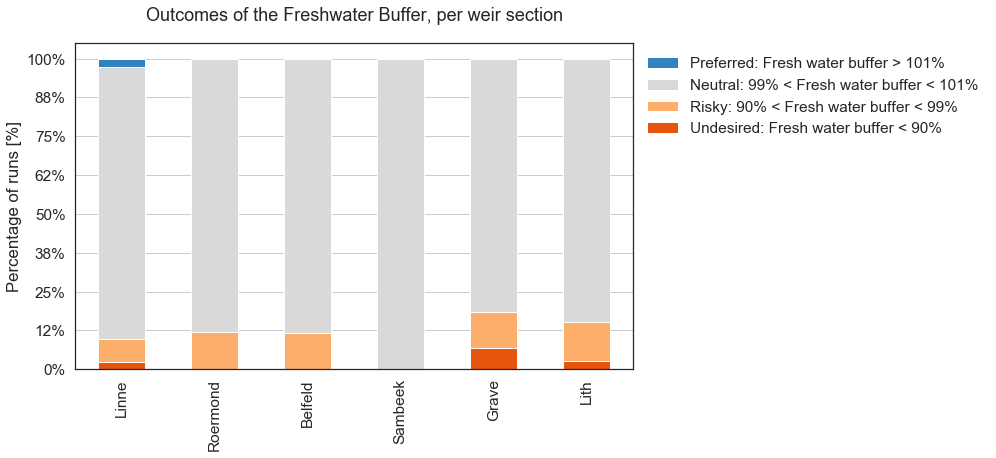

In [218]:
#FRESH WATER BUFFER
palette = sns.color_palette('tab20c')
sns.set(font_scale=1.4, style='white')
color_values = ([palette[4],palette[6], palette[19], palette[0]])

g = barplot_fwb.plot(kind='bar', stacked=True, color=color_values,figsize=(10,6))
handles, labels = g.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels),loc = 2, bbox_to_anchor = (1,1), frameon=False)
plt.title('Outcomes of the Freshwater Buffer, per weir section', fontsize=18, y=1.05)
plt.ylabel('Percentage of runs [%]')
g.yaxis.set_major_formatter(mtick.PercentFormatter(8000))
g.grid(axis='y')

C:\Programs\Anaconda3\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


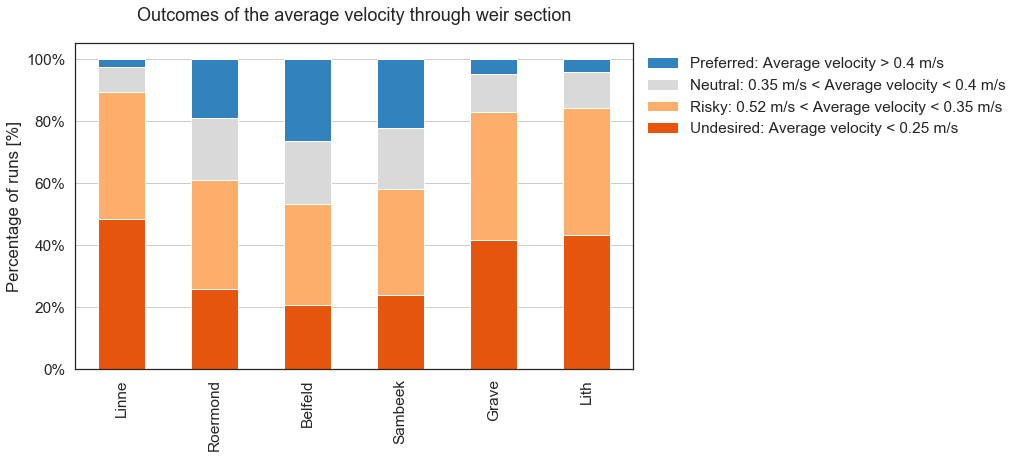

In [219]:
#AVERAGE VELOCITY
palette = sns.color_palette('tab20c')
color_values = ([palette[4],palette[6], palette[19], palette[0]])

g = barplot_vel.plot(kind='bar', stacked=True, colors=color_values,figsize=(10,6))
handles, labels = g.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels),loc = 2, bbox_to_anchor = (1,1), frameon=False)
plt.title('Outcomes of the average velocity through weir section', fontsize=18, y=1.05)
plt.ylabel('Percentage of runs [%]')
g.yaxis.set_major_formatter(mtick.PercentFormatter(100))
g.grid(axis='y')

C:\Programs\Anaconda3\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


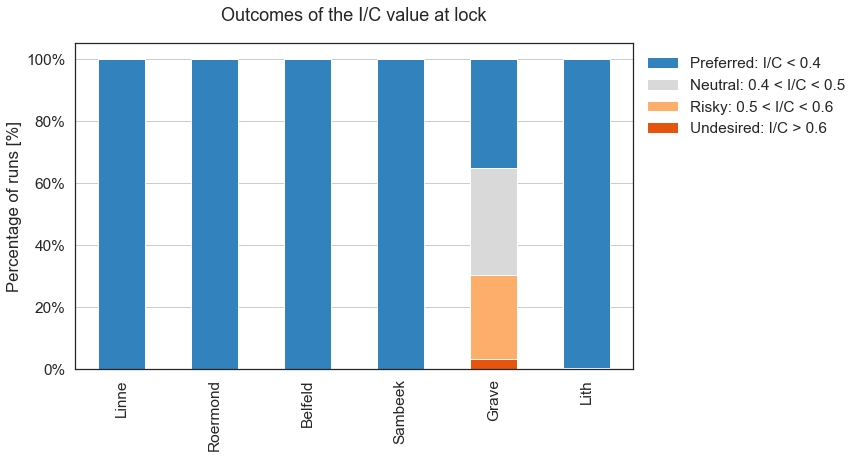

In [220]:
#IC VALUE
palette = sns.color_palette('tab20c')
color_values = ([palette[4],palette[6], palette[19], palette[0]])

g = barplot_ic.plot(kind='bar', stacked=True, colors=color_values,figsize=(10,6))
handles, labels = g.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels),loc = 2, bbox_to_anchor = (1,1), frameon=False)
plt.title('Outcomes of the I/C value at lock', fontsize=18, y=1.05)
plt.ylabel('Percentage of runs [%]')
g.yaxis.set_major_formatter(mtick.PercentFormatter(100))
g.grid(axis='y')

# Lineplot

In [96]:
test = nopols[nopols.columns[0:190]]
unsure = nopols[nopols.columns[190:]]
test1 = maxdepth[maxdepth.columns[0:190]]
unsure1 = maxdepth[maxdepth.columns[190:]]

In [97]:
x1=[]
x=[]


for j in range((57)):
    x1.append(round(-0.4526*j+36.136,2))


for i in range((190-57)):
    x.append(round(-0.1086*i+10,2))
    
bottom = x1+x

In [98]:
"""
bottom= [34.89,35.33,35.26,33.49,33.28,33.08,33.17,33.09,33.94,33.11,32.61,33.13,30.73,29.58,29.62,29.09,30.04,29.47,28.45,
26.59,25.81,23.32,25.02,25.35,23.65,24.29,22.68,22.33,22.55,21.9,21.39,21.7,21.3,21.89,19.86,18.67,20.05,18.18,17.77,17.36,
15.72,17.14,12.61,14.68,15.2,15.78,14.73,11.78,14.61,14.96,14.65,13.13,13.36,13.77,12.61,12.91,11.41,10.99,11.32,9.11,10.78,
10.26,9.42,8.34,8.46,10.26,10.37,10.4,9.7,5.31,9.11,7.84,8.73,8.8,8.06,8.65,7.55,6.95,6.2,6.18,7.89,7.27,7.81,7.57,6.93,7.03,
7.13,7.15,4.56,4.59,5.35,5.44,4.49,5.47,5.82,5.67,5.19,3.53,3.51,3.2,3.2,1.71,3.21,3.98,4,3.99,3.79,3.64,5.1,4.97,5.29,4.54,
4.71,4.93,5.15,4.99,4.69,4.31,3.73,3.85,3.41,3.39,3.48,2.82,3.4,3.55,3.37,2.49,3.41,2.95,3.04,2.95,3,2.84,3.24,3.9,3.05,1.87,
1.56,1.16,0.76,1.5,0.91,0.72,-0.9,-0.68,-0.69,-1.81,-1.33,-1.45,-1.8,-2.04,-1.23,-1.65,-1.66,-1.72,-1.53,-1.86,-1.84,-0.81,-0.81,
-0.99,-1.04,0.03,-2.82,-2.2,-2.7,-2.79,-3.24,-3.1,-2.44,-1.79,-1.99,-2.32,-3.25,-2.57,-2.05,-1.99,-2.87,-2.15,-2.96,-4.47,-3.32,
-4.37,-4.01,-3.73,-3.7,-3.53,-4.5,-5.44]
"""

'\nbottom= [34.89,35.33,35.26,33.49,33.28,33.08,33.17,33.09,33.94,33.11,32.61,33.13,30.73,29.58,29.62,29.09,30.04,29.47,28.45,\n26.59,25.81,23.32,25.02,25.35,23.65,24.29,22.68,22.33,22.55,21.9,21.39,21.7,21.3,21.89,19.86,18.67,20.05,18.18,17.77,17.36,\n15.72,17.14,12.61,14.68,15.2,15.78,14.73,11.78,14.61,14.96,14.65,13.13,13.36,13.77,12.61,12.91,11.41,10.99,11.32,9.11,10.78,\n10.26,9.42,8.34,8.46,10.26,10.37,10.4,9.7,5.31,9.11,7.84,8.73,8.8,8.06,8.65,7.55,6.95,6.2,6.18,7.89,7.27,7.81,7.57,6.93,7.03,\n7.13,7.15,4.56,4.59,5.35,5.44,4.49,5.47,5.82,5.67,5.19,3.53,3.51,3.2,3.2,1.71,3.21,3.98,4,3.99,3.79,3.64,5.1,4.97,5.29,4.54,\n4.71,4.93,5.15,4.99,4.69,4.31,3.73,3.85,3.41,3.39,3.48,2.82,3.4,3.55,3.37,2.49,3.41,2.95,3.04,2.95,3,2.84,3.24,3.9,3.05,1.87,\n1.56,1.16,0.76,1.5,0.91,0.72,-0.9,-0.68,-0.69,-1.81,-1.33,-1.45,-1.8,-2.04,-1.23,-1.65,-1.66,-1.72,-1.53,-1.86,-1.84,-0.81,-0.81,\n-0.99,-1.04,0.03,-2.82,-2.2,-2.7,-2.79,-3.24,-3.1,-2.44,-1.79,-1.99,-2.32,-3.25,-2.57,-2.05,-1.99,-2.87,-2.15,

In [99]:
data=(test[test.columns[0]] + bottom[0]).to_frame()
for i in range(190):
    probeer = (test[test.columns[i]] + bottom[i]).to_frame()
    data=pd.concat([data,probeer], axis=1)
    
    
data1=(test1[test1.columns[0]] + bottom[0]).to_frame()
for i in range(190):
    probeer1 = (test1[test1.columns[i]] + bottom[i]).to_frame()
    data1=pd.concat([data1,probeer1], axis=1)
    
    
NAPmin = pd.concat([data,unsure], axis=1)
NAPmin = NAPmin.iloc[:,1:]
NAPmax = pd.concat([data1,unsure1], axis=1)
NAPmax = NAPmax.iloc[:,1:]

In [174]:
first=0#137
last=190#164

a = NAPmin[NAPmin.columns[first:last]]#nopols[nopols.columns[first:last]]
b = NAPmin[NAPmin.columns[190:]]#nopols[nopols.columns[190:]]
c = NAPmax[NAPmax.columns[first:last]]#maxdepth[maxdepth.columns[first:last]]
d = NAPmax[NAPmax.columns[190:]]#maxdepth[maxdepth.columns[190:]]
nopol = pd.concat([a,b], axis=1)
maxdepths = pd.concat([c,d], axis=1)


In [175]:
loc = c.keys()
percent=int(len(c)*0.1)

all_max = []
for i in range(len(loc)):
    all_max.append(np.round(np.mean(c.iloc[:,i].nlargest(80)),2))
    

all_min = []
for i in range(len(loc)):
    all_min.append(np.round(np.mean(a.iloc[:,i].nsmallest(800)),2))

In [176]:
mindf_2020 = nopol.loc[nopol['Simulated year'] == 2024]
mindf_2020.reset_index(drop=True,  inplace=True)
mindf_2040 = nopol.loc[nopol['Simulated year'] == 2040]
mindf_2040.reset_index(drop=True,  inplace=True)
mindf_2070 = nopol.loc[nopol['Simulated year'] == 2070]
mindf_2070.reset_index(drop=True,  inplace=True)
mindf_2100 = nopol.loc[nopol['Simulated year'] == 2100]
mindf_2100.reset_index(drop=True,  inplace=True)

maxdf_2020 = maxdepths.loc[maxdepth['Simulated year'] == 2025]
maxdf_2020.reset_index(drop=True,  inplace=True)
maxdf_2040 = maxdepths.loc[maxdepth['Simulated year'] == 2040]
maxdf_2040.reset_index(drop=True,  inplace=True)
maxdf_2070 = maxdepths.loc[maxdepth['Simulated year'] == 2070]
maxdf_2070.reset_index(drop=True,  inplace=True)
maxdf_2100 = maxdepths.loc[maxdepth['Simulated year'] == 2100]
maxdf_2100.reset_index(drop=True,  inplace=True)

In [177]:
mindata_2020 = mindf_2020.iloc[:,0:(last-first)]
mindata_2040 = mindf_2040.iloc[:,0:(last-first)]
mindata_2070 = mindf_2070.iloc[:,0:(last-first)]
mindata_2100 = mindf_2100.iloc[:,0:(last-first)]
maxdata_2020 = maxdf_2020.iloc[:,0:(last-first)]
maxdata_2040 = maxdf_2040.iloc[:,0:(last-first)]
maxdata_2070 = maxdf_2070.iloc[:,0:(last-first)]
maxdata_2100 = maxdf_2100.iloc[:,0:(last-first)]

In [178]:
mindepth_2020 = []
for i in range(len(loc)):
    mindepth_2020.append(np.round(np.mean(mindata_2020.iloc[:,i].nsmallest(14)),2))
    
mindepth_2040 = []
for i in range(len(loc)):
    mindepth_2040.append(np.round(np.mean(mindata_2040.iloc[:,i].nsmallest(14)),2))
    
mindepth_2070 = []
for i in range(len(loc)):
    mindepth_2070.append(np.round(np.mean(mindata_2070.iloc[:,i].nsmallest(14)),2))
    
    
mindepth_2100 = []
for i in range(len(loc)):
    mindepth_2100.append(np.round(np.mean(mindata_2100.iloc[:,i].nsmallest(14)),2))
    
    
    
maxdepth_2020 = []
for i in range(len(loc)):
    maxdepth_2020.append(np.round(np.mean(maxdata_2020.iloc[:,i].nlargest(4)),2))
    
maxdepth_2040 = []
for i in range(len(loc)):
    maxdepth_2040.append(np.round(np.mean(maxdata_2040.iloc[:,i].nlargest(4)),2))
    
maxdepth_2070 = []
for i in range(len(loc)):
    maxdepth_2070.append(np.round(np.mean(maxdata_2070.iloc[:,i].nlargest(4)),2))
    
maxdepth_2100 = []
for i in range(len(loc)):
    maxdepth_2100.append(np.round(np.mean(maxdata_2100.iloc[:,i].nlargest(4)),2))

C:\Programs\Anaconda3\lib\site-packages\matplotlib\legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "
C:\Programs\Anaconda3\lib\site-packages\matplotlib\legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


(-6, 14)

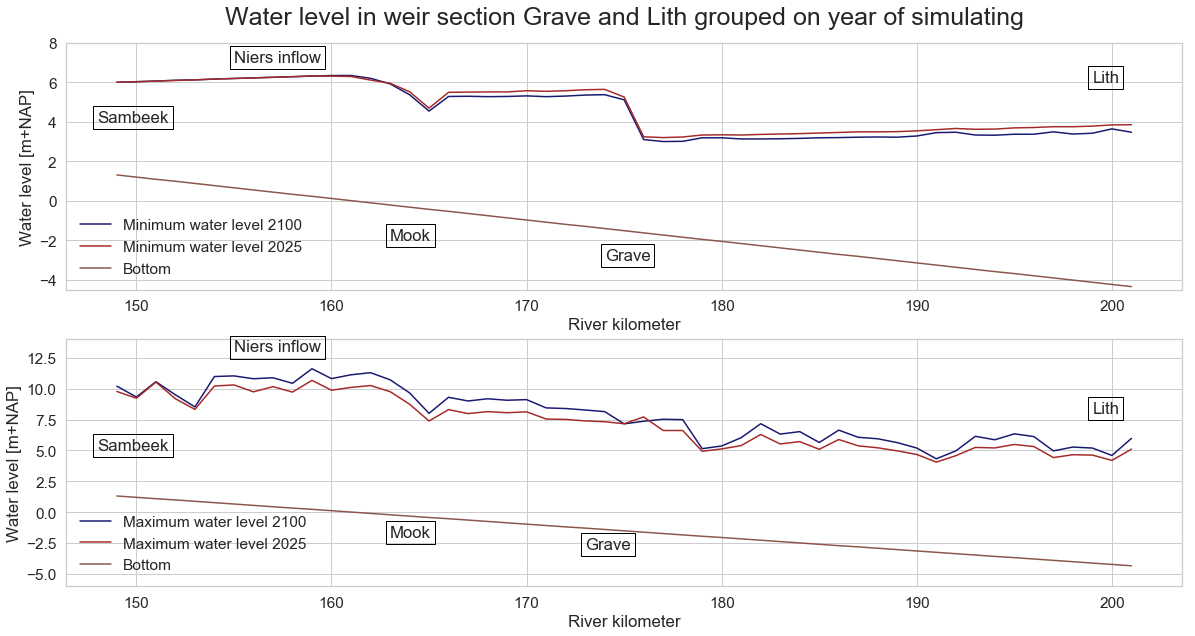

In [172]:
#PLOT WHOLE RIVER MEUSE SECTION
sns.set(font_scale=1.4, style='whitegrid')
plt.figure(figsize=(20, 10))
x=list(range(first+12,last+12))



plt.subplot(2,1,1)
plt.plot(x,mindepth_2100,color='midnightblue' )
plt.plot(x,mindepth_2020,color='brown' )
plt.plot(x,bottom[first:last],color='tab:brown' )
plt.legend([0,1,2,3,4],labels=['Minimum water level 2100','Minimum water level 2025',
                                'Bottom'], loc="lower left", frameon=False)

plt.ylabel('Water level [m+NAP]')
plt.xlabel('River kilometer')
plt.title('Water level in weir section Grave and Lith grouped on year of simulating', fontsize=25, x=0.5, y=1.05)
plt.text(148,4,'Sambeek',     bbox=dict(facecolor='none', edgecolor='black'))
plt.text(155,7,'Niers inflow',bbox=dict(facecolor='none', edgecolor='black'))
plt.text(163,-2,'Mook',        bbox=dict(facecolor='none', edgecolor='black'))
plt.text(174,-3,'Grave',       bbox=dict(facecolor='none', edgecolor='black'))
plt.text(199,6,'Lith',         bbox=dict(facecolor='none', edgecolor='black'))
plt.ylim(-4.5,8)



plt.subplot(2,1,2)
plt.plot(x,maxdepth_2100,color='midnightblue' )
plt.plot(x,maxdepth_2020,color='brown' )
plt.plot(x,bottom[first:last],color='tab:brown' )
plt.legend([0,1,2,3,4],labels=['Maximum water level 2100','Maximum water level 2025',
                               'Bottom'], loc="lower left", frameon=False)

plt.ylabel('Water level [m+NAP]')
plt.xlabel('River kilometer')
plt.text(148,5,'Sambeek',     bbox=dict(facecolor='none', edgecolor='black'))
plt.text(155,13,'Niers inflow',bbox=dict(facecolor='none', edgecolor='black'))
plt.text(163,-2,'Mook',        bbox=dict(facecolor='none', edgecolor='black'))
plt.text(173,-3,'Grave',       bbox=dict(facecolor='none', edgecolor='black'))
plt.text(199,8,'Lith',         bbox=dict(facecolor='none', edgecolor='black'))
plt.ylim(-6,14)

C:\Programs\Anaconda3\lib\site-packages\matplotlib\legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "
C:\Programs\Anaconda3\lib\site-packages\matplotlib\legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


Text(199,8,'Lith')

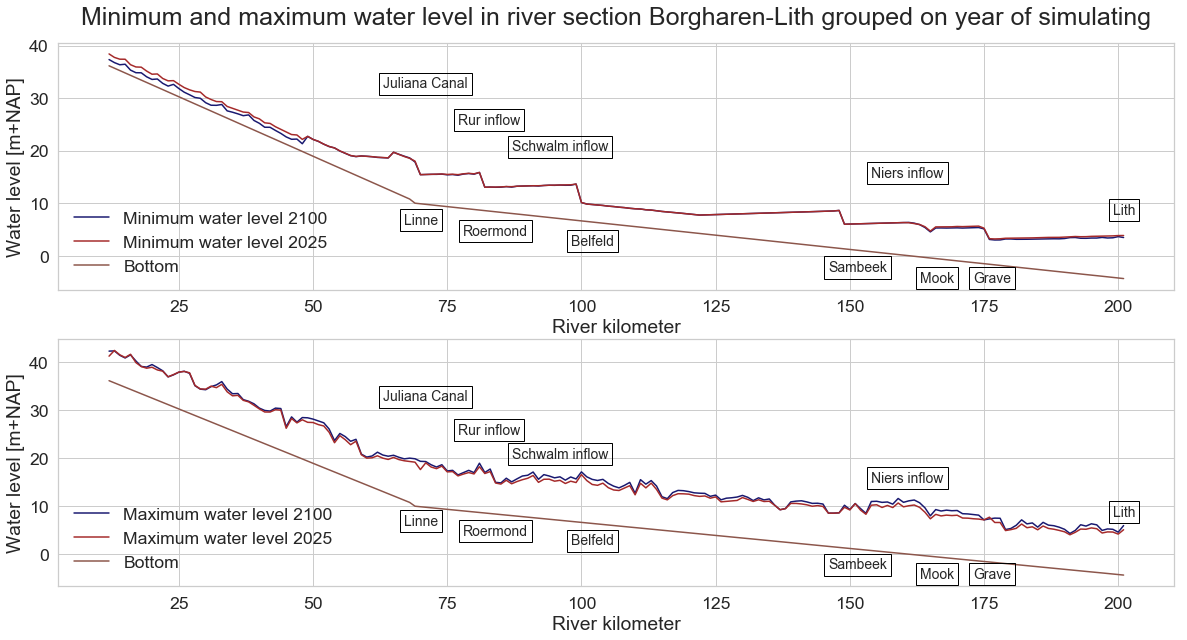

In [181]:
plt.figure(figsize=(20, 10))
x=list(range(first+12,last+12))
sns.set(font_scale=1.6, style='whitegrid')



plt.subplot(2,1,1)
plt.plot(x,mindepth_2100,color='midnightblue' )
plt.plot(x,mindepth_2020,color='brown' )
plt.plot(x,bottom[first:last],color='tab:brown' )
plt.legend([0,1,2,3,4],labels=['Minimum water level 2100','Minimum water level 2025',
                                'Bottom'], loc="lower left", frameon=False)
plt.ylabel('Water level [m+NAP]')
plt.xlabel('River kilometer')
plt.title('Minimum and maximum water level in river section Borgharen-Lith grouped on year of simulating', fontsize=25, x=0.5, y=1.05)
plt.text(63,32,'Juliana Canal', bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.text(67,6,'Linne',          bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.text(77,25,'Rur inflow',    bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.text(78,4,'Roermond',       bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.text(87,20,'Schwalm inflow',bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.text(98,2,'Belfeld',        bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.text(146,-3,'Sambeek',      bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.text(154,15,'Niers inflow', bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.text(163,-5,'Mook',         bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.text(173,-5,'Grave',        bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.text(199,8,'Lith',          bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)



plt.subplot(2,1,2)
plt.plot(x,maxdepth_2100,color='midnightblue' )
plt.plot(x,maxdepth_2020,color='brown')
plt.plot(x,bottom[first:last],color='tab:brown' )
plt.legend([0,1,2,3,4],labels=['Maximum water level 2100','Maximum water level 2025',
                               'Bottom'], loc="lower left", frameon=False)
plt.ylabel('Water level [m+NAP]')
plt.xlabel('River kilometer')
plt.text(63,32,'Juliana Canal', bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.text(67,6,'Linne',          bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.text(77,25,'Rur inflow',    bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.text(78,4,'Roermond',       bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.text(87,20,'Schwalm inflow',bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.text(98,2,'Belfeld',        bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.text(146,-3,'Sambeek',      bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.text(154,15,'Niers inflow', bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.text(163,-5,'Mook',         bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.text(173,-5,'Grave',        bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.text(199,8,'Lith',          bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)

# Sensitivity analysis with feature scoring

In [125]:
#Select KPIs to take into account, not running this cell takes all KPIs into account
interesting_keys = outcomes_plot
outcomes_new2 = {KPI: outcomes[KPI] for KPI in interesting_keys}



[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


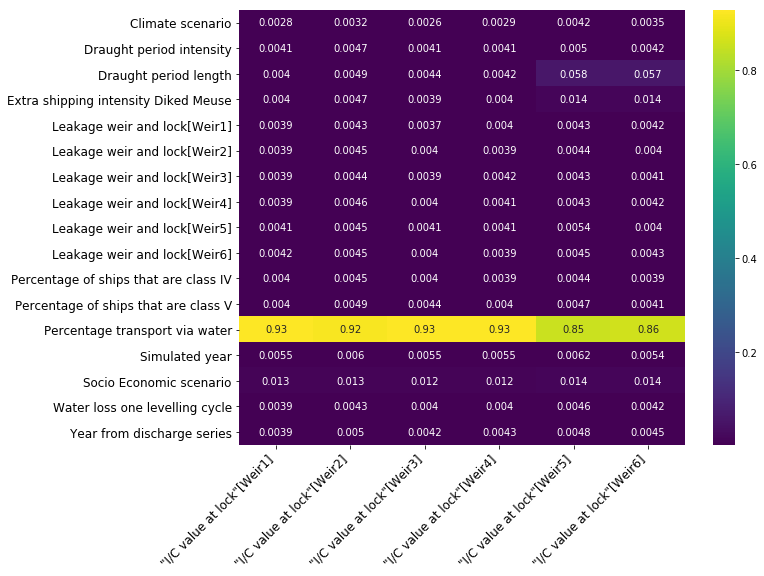

In [126]:
#Simuleert niet als experiments is ge-post processed 
from ema_workbench.analysis import feature_scoring

x = experiments
y = outcomes_new2 

fs = feature_scoring.get_feature_scores_all(x, y)

plt.figure(figsize = (10,8))
ax = sns.heatmap(fs, cmap='viridis', annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right',
                   fontweight='light', fontsize=12)

plt.yticks(fontsize=12) 

plt.show()

# PRIM

In [101]:
#Select from:
'Percentage of full fresh water buffer[Weir1]'
'Percentage of full fresh water buffer[Weir2]'
'Percentage of full fresh water buffer[Weir3]'
'Percentage of full fresh water buffer[Weir4]'
'Percentage of full fresh water buffer[Weir5]'
'Percentage of full fresh water buffer[Weir6]'
'Average velocity through weir section[Weir1]'
'Average velocity through weir section[Weir2]'
'Average velocity through weir section[Weir3]'
'Average velocity through weir section[Weir4]'
'Average velocity through weir section[Weir5]'
'Average velocity through weir section[Weir6]'
'"I/C value at lock"[Weir1]'
'"I/C value at lock"[Weir2]'
'"I/C value at lock"[Weir3]'
'"I/C value at lock"[Weir4]'
'"I/C value at lock"[Weir5]'
'"I/C value at lock"[Weir6]'
'Days of free flow'


'Days of free flow'

In [116]:
def classify(data):
    i = '"I/C value at lock"[Weir6]'
    outcome = np.max(outcomes[i], axis=1)
    classes = np.zeros(outcome.shape[0])
    classes[outcome>  0.28] = 1   #(.9 * outcomes[i].max())
    return classes


prim_obj = prim.setup_prim(results, classify, threshold=0.8)
box5 = prim_obj.find_box()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 8000 points remaining, containing 633 cases of interest
[MainProcess/INFO] mean: 0.9075425790754258, mass: 0.051375, coverage: 0.5892575039494471, density: 0.9075425790754258 restricted_dimensions: 4


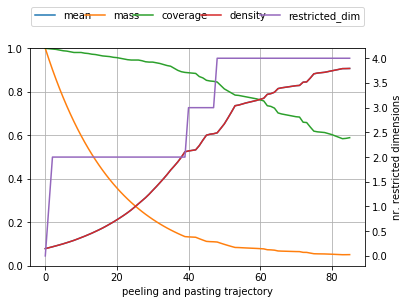

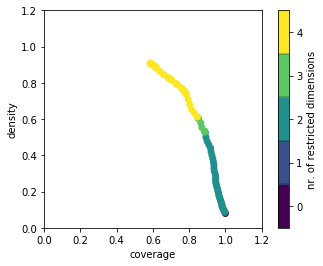

coverage    0.589258
density     0.907543
id                85
mass        0.051375
mean        0.907543
res_dim            4
Name: 85, dtype: object

                                                                                 box 85  \
                                                                                    min   
Percentage transport via water                                                 0.269666   
Extra shipping intensity Diked Meuse                                           0.374996   
Year from discharge series            {1911, 1912, 1914, 1915, 1917, 1918, 1920, 192...   
Simulated year                        {2048.0, 2049.0, 2050.0, 2051.0, 2052.0, 2053....   

                                                                                         \
                                                                                    max   
Percentage transport via water                                                 0.299981   
Extra shipping intensity Dike

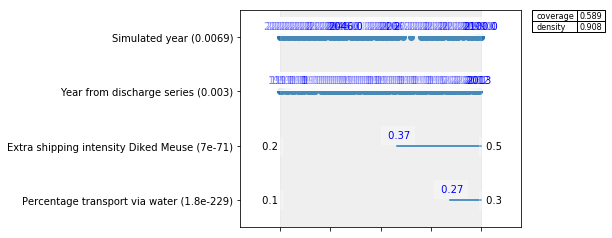

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


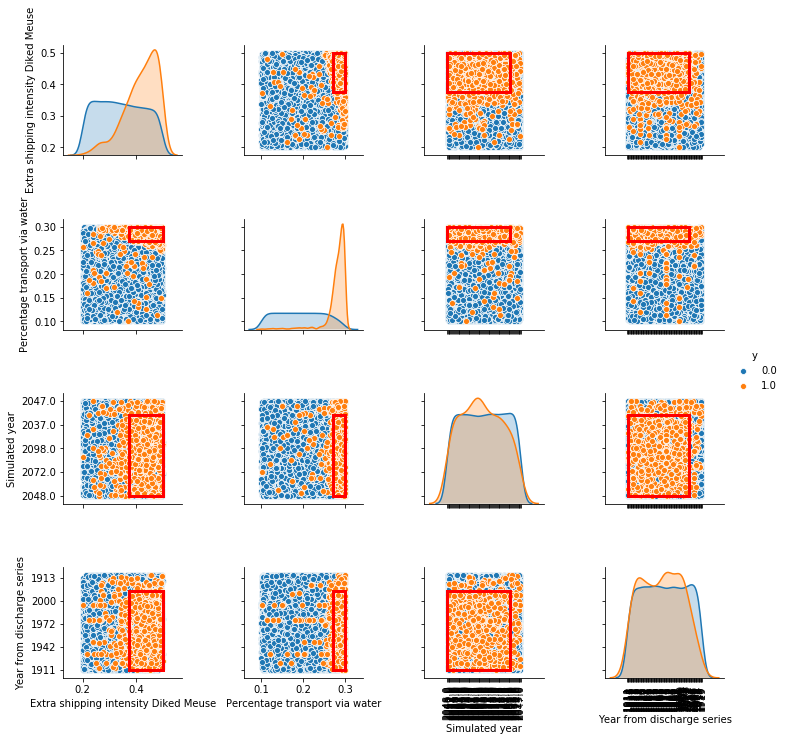

In [117]:
box5.show_ppt()

box5.show_tradeoff()
plt.show()

box5.inspect()
box5.inspect(style='graph')
plt.show()

box5.show_pairs_scatter()
plt.show()